# Natural Language Processing

## Introduction

This project uses natural language processing to help classify Yelp Reviews into 1 star or 5 star groups based on the text content of the yelp reviews. This dataset is located on Kaggle.com and features yelp reviews from 2005 to 2013.

Each row in this dataset is a review of a specific business by the yelp user. The stars in the dataset indicate satisfaction with 1 star being the most dissatisfied and 5 star being the most satisfied.

Yelp has a system where other users can rate reviews. Columns like 'cool', 'useful' and 'funny' are distinctions that users give other reviews. Each review can have an unlimited number of user distinctions.

For this example, we will create two models to predict whether a review will be 1 or 5 stars based on the review text. The first model will not account for TF-IDF (term frequency-inverse document frequency) while the second model will. The second model will also use a pipeline method that could also be used in the first. This project will show how to accomplish our goal with either method.

In [11]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


We have 10,000 observations in this dataset. We can see that the average review has 3.7 stars. This shows that this set has a fairly positive sentiment in terms of review scoring. We can use language process to try and create a model that could predict the 'stars' based on the text of the review for the future! Let's get started!

In [9]:
yelp['text length'] = yelp['text'].apply(len)
# this creates a new column that shows the number of characters in the text column"

In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Exploratory Data Analysis

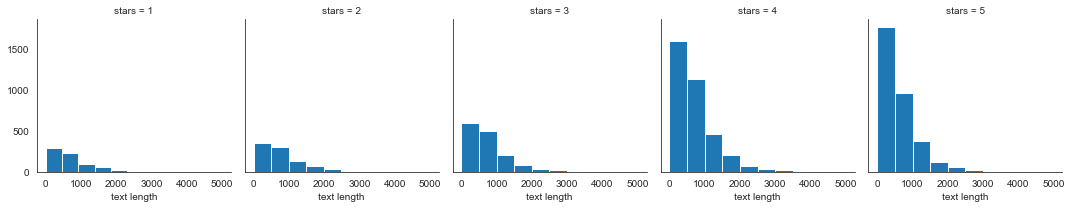

In [12]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

<AxesSubplot:xlabel='stars', ylabel='count'>

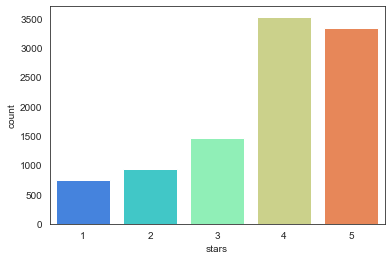

In [14]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

By visualizing our data, we can see some interesting things right away. We see that that there are much higher numbers of 4 and 5 star reviews in this dataset. This confirms our early idea with the mean of the reviews at 3.7. This is an overly positive dataset and DOES skew towards positive reviews. This could affect our model prediction as we do not have as many lower reviews. We definitely do not see a normal distribution here.

We can also see that all of the star categories are more likely to be on the shorter end of character length. Basically, most reviews are within the same word length but they tend to get longer as the star of the review increases.

In [15]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [16]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

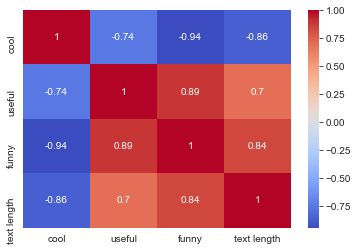

In [17]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In terms of correlating the columns, we can see that text length and how funny the reviewers think each review is are positively. Brevity does not seem to relate to comedy in this instance, sorry Shakespeare. We can also see that usefulness of the review and text length are also positively related but 'coolness' has a strong negative relationship. We can see fairly strong relationships (both positive and negative) with almost every variable combination.

# Model 1: NLP Classification Task

In [61]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [62]:
yelp_class.describe()

,stars,cool,useful,funny,text length
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,4.266765,0.876897,1.422663,0.690651,661.938815
std,1.547868,2.336611,2.598515,1.961751,601.621371
min,1.000000,0.000000,0.000000,0.000000,6.000000
25%,5.000000,0.000000,0.000000,0.000000,256.000000
50%,5.000000,0.000000,1.000000,0.000000,489.500000
75%,5.000000,1.000000,2.000000,1.000000,878.000000
max,5.000000,77.000000,76.000000,39.000000,4986.000000


In [63]:
X=yelp_class['text']
y=yelp_class['stars']

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [33]:
X = cv.fit_transform(X)

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training A Model

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(X_train,y_train)

MultinomialNB()

## Predictions and Evaluations

In [43]:
predictions = nb.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



For this first model, we are looking at an accuracy of predicting the star of the review based on the text of 93%. This seems to be like a great model overall. However, we can see where the f1 score of predicting the 1 star reviews is MUCH lower than the 5. As discussed above, the slant of the dataset to higher reviews actually works against us for prediction power. A more evenly balanced dataset could really help increase that f1 score of the 1 star review predictor.

#  Model 2: Using Text Processing And TF-IDF In Model

TF-IDF or term frequency-inverse document frequency is an important concept that is used in many text processing models to help gauge relevancy within our dataset. TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents (corpus).

We understand this concept as the multiplication of how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

By inclusing this as a step in our pipeline (line 3 in the pipeline code) we make our model contend with the relevancy and inverse relevancy of the bag of words as it pertains to the entire dataset.

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [75]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### Using the Pipeline

Now we are going to use a pipeline to do every pre-process step in one! This means that we will need to re-split the original data. Remember that this project shows both ways to accomplish the same model but with the added TF-IDF metric. The pipeline can be used in either method and is usually the preferred method of accomplishing this task.

In [76]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [77]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [78]:
predictions = pipeline.predict(X_test)

In [79]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\dmozingo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmozingo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmozingo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


When we take into consideration the TF-IDF metrics, we actually see a significant drop in accuracy of our mode. There are some reasons why this could happen. 1) There is class imbalance in that words in the more frequent class risk having a lower IDF which causes them to have a lower weight. 2) If there are words with a high frequency that are very predictive of one of the classes (words found in a lot of documents in one class). Both of these can be due to our skew towards higher reviews AND need for more processing of our text column.

# Conclusion

Overall, the first model did a fairly good job of predicting both 1 and 5 star reviews. In this case, we could be confident in using data without star information to predict 1 or 5 stars with our first model. More evenly and normally distributed data would be a major benefit for our second model and could end up increasing accuracy in our excellent first model.